### Importing the necessary libraries for data exploration

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sb

In [63]:
### Reading the file

df = pd.read_csv("L_application_data.csv")

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


#### As we can observe, we have 307,511 rows and 122 features in our dataset

In [65]:
### Printing the fist five rows of the data

df.head(20)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.000,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.000,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.000,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.000,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.000,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
df2 = pd.read_csv("previous_application_1.csv")

In [67]:
df2.shape

(1670214, 37)

In [68]:
df = pd.merge(df, df2[['SK_ID_CURR', 'AMT_CREDIT', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'CODE_REJECT_REASON', 'NAME_YIELD_GROUP']], 
               on = "SK_ID_CURR", indicator = True, left_index = True, right_index = True, 
              suffixes = ('_current', '_previous'))

df.SK_ID_CURR.nunique()

307511

In [69]:
df.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_current,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT_previous,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,CODE_REJECT_REASON,NAME_YIELD_GROUP,_merge
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,1.0,17145.0,XAP,Approved,XAP,middle,both
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,679671.0,XNA,Approved,XAP,low_action,both
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,136444.5,XNA,Approved,XAP,high,both
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,470790.0,XNA,Approved,XAP,middle,both
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,404055.0,Repairs,Refused,HC,high,both
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0.0,0.0,1.0,1.0,340573.5,Everyday expenses,Approved,XAP,low_normal,both
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0.0,1.0,1.0,2.0,0.0,XNA,Canceled,XAP,XNA,both
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0.0,0.0,0.0,0.0,0.0,XNA,Canceled,XAP,XNA,both
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0.0,0.0,0.0,1.0,0.0,XNA,Canceled,XAP,XNA,both
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,NaN,NaN,NaN,NaN,0.0,XNA,Canceled,XAP,XNA,both


In [70]:
correlation_matirx = df.corr()

correlation_matirx.TARGET

SK_ID_CURR                   -0.002108
TARGET                        1.000000
CNT_CHILDREN                  0.019187
AMT_INCOME_TOTAL             -0.003982
AMT_CREDIT_current           -0.030369
                                ...   
AMT_REQ_CREDIT_BUREAU_WEEK    0.000788
AMT_REQ_CREDIT_BUREAU_MON    -0.012462
AMT_REQ_CREDIT_BUREAU_QRT    -0.002022
AMT_REQ_CREDIT_BUREAU_YEAR    0.019930
AMT_CREDIT_previous           0.001833
Name: TARGET, Length: 107, dtype: float64

## Exploratory data analysis

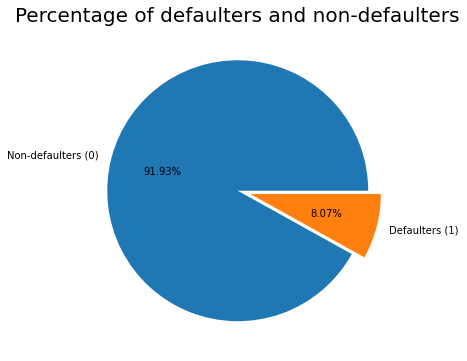

In [71]:
### Visualizing the number of defaulters and non-defaulters

plt.figure(figsize = (8, 6))
plt.title("Percentage of defaulters and non-defaulters", fontsize = 20)

### Number of defaulters and non-defaulters
D_N = df.TARGET.value_counts(normalize = True)*100

plt.pie(D_N, labels = ['Non-defaulters (0)', 'Defaulters (1)'], explode = (0, 0.1),
                       autopct = '%.2f%%')

plt.show()

#### As we can observe we have a highly non-balanced classes in our dataset.

In [72]:
print(df[df.CODE_GENDER == "M"]['TARGET'].value_counts(normalize = True)*100)
print(df[df.CODE_GENDER == "F"]['TARGET'].value_counts(normalize = True)*100)

### Males on average default more on loans than females

0    89.85808
1    10.14192
Name: TARGET, dtype: float64
0    93.000672
1     6.999328
Name: TARGET, dtype: float64


In [73]:
# A function showing some basic characteristics of the features of the data

def column_info(columns, col_dtype = None):
    ### col_dtype is an optional argument that indicates the data type of the column that we want to get 
    ### if we don't specify any type, the function will return all of the columns
    ### if the number of unique values is more than 10, it will just specify the number of unique values
    ### and will list them otherwise
    for column in columns:
        if col_dtype is None:
            print(f"{column} --- {df[column].dtype}")
            
            nulls = [df[column].isnull().sum(), round(df[column].isnull().mean(), 1)*100]
            print(f"Number of nulls --- {nulls[0]} ({nulls[1]}%)")
            
            if df[column].nunique() > 10:
                print("Number of unique values ---", df[column].nunique())
            else:
                print("Unique values ---", df[column].unique())
                
            print(df[column].value_counts() , "\n") 
            
        else:
            if df[column].dtype == col_dtype:
                print(f"{column} --- {df[column].dtype}")
            
                nulls = [df[column].isnull().sum(), round(df[column].isnull().mean(), 1)*100]
                print(f"Number of nulls --- {nulls[0]} ({nulls[1]}%)")
                
                if df[column].nunique() > 10:
                    print("Number of unique values ---", df[column].nunique())
                else:
                    print("Unique values ---", df[column].unique())
                    
                print(df[column].value_counts() , "\n") 

In [12]:
column_info(list(df.columns))

SK_ID_CURR --- int64
Number of nulls --- 0 (0.0%)
Number of unique values --- 307511
100303    1
131861    1
158488    1
156441    1
160539    1
         ..
255446    1
257495    1
234968    1
237017    1
100401    1
Name: SK_ID_CURR, Length: 307511, dtype: int64 

TARGET --- int64
Number of nulls --- 0 (0.0%)
Unique values --- [1 0]
0    282686
1     24825
Name: TARGET, dtype: int64 

NAME_CONTRACT_TYPE --- object
Number of nulls --- 0 (0.0%)
Unique values --- ['Cash loans' 'Revolving loans']
Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64 

CODE_GENDER --- object
Number of nulls --- 0 (0.0%)
Unique values --- ['M' 'F' 'XNA']
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64 

FLAG_OWN_CAR --- object
Number of nulls --- 0 (0.0%)
Unique values --- ['N' 'Y']
N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64 

FLAG_OWN_REALTY --- object
Number of nulls --- 0 (0.0%)
Unique values --- ['Y' 'N']
Y    213312
N     9419

Number of nulls --- 0 (0.0%)
Unique values --- [2 1 3]
2    226984
3     48330
1     32197
Name: REGION_RATING_CLIENT, dtype: int64 

REGION_RATING_CLIENT_W_CITY --- int64
Number of nulls --- 0 (0.0%)
Unique values --- [2 1 3]
2    229484
3     43860
1     34167
Name: REGION_RATING_CLIENT_W_CITY, dtype: int64 

WEEKDAY_APPR_PROCESS_START --- object
Number of nulls --- 0 (0.0%)
Unique values --- ['WEDNESDAY' 'MONDAY' 'THURSDAY' 'SUNDAY' 'SATURDAY' 'FRIDAY' 'TUESDAY']
TUESDAY      53901
WEDNESDAY    51934
MONDAY       50714
THURSDAY     50591
FRIDAY       50338
SATURDAY     33852
SUNDAY       16181
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64 

HOUR_APPR_PROCESS_START --- int64
Number of nulls --- 0 (0.0%)
Number of unique values --- 24
10    37722
11    37229
12    34233
13    30959
14    27682
9     27384
15    24839
16    20385
8     15127
17    14900
7      9131
18     9049
6      5842
19     3848
5      3638
4      2090
3      1230
20     1196
21      405
2       305
22      150
1

NONLIVINGAPARTMENTS_AVG --- float64
Number of nulls --- 213514 (70.0%)
Number of unique values --- 386
0.0000    54549
0.0039    13606
0.0077     6351
0.0116     3714
0.0154     2533
          ...  
0.2452        1
0.6023        1
0.3629        1
0.6795        1
0.0946        1
Name: NONLIVINGAPARTMENTS_AVG, Length: 386, dtype: int64 

NONLIVINGAREA_AVG --- float64
Number of nulls --- 169682 (60.0%)
Number of unique values --- 3290
0.0000    58735
0.0012      546
0.0044      454
0.0022      440
0.0031      415
          ...  
0.6440        1
0.2855        1
0.3042        1
0.2478        1
0.2498        1
Name: NONLIVINGAREA_AVG, Length: 3290, dtype: int64 

APARTMENTS_MODE --- float64
Number of nulls --- 156061 (50.0%)
Number of unique values --- 760
0.0840    7522
0.0630    7451
0.0945    4757
0.0735    4388
0.0084    3970
          ... 
0.8445       1
0.8971       1
0.5945       1
0.8676       1
0.7532       1
Name: APARTMENTS_MODE, Length: 760, dtype: int64 

BASEMENTAREA_MODE --- f

0.0000    299
0.0548    239
0.0518    234
0.0520    233
0.0521    232
         ... 
0.4183      1
0.6305      1
0.5266      1
0.3131      1
0.5239      1
Name: LIVINGAREA_MEDI, Length: 5281, dtype: int64 

NONLIVINGAPARTMENTS_MEDI --- float64
Number of nulls --- 213514 (70.0%)
Number of unique values --- 214
0.0000    56097
0.0039    14126
0.0078     6493
0.0116     3788
0.0155     2557
          ...  
0.8890        1
0.4328        1
0.3649        1
0.3513        1
0.7065        1
Name: NONLIVINGAPARTMENTS_MEDI, Length: 214, dtype: int64 

NONLIVINGAREA_MEDI --- float64
Number of nulls --- 169682 (60.0%)
Number of unique values --- 3323
0.0000    60954
0.0012      539
0.0022      478
0.0037      456
0.0044      431
          ...  
0.3305        1
0.2427        1
0.1831        1
0.2288        1
0.3657        1
Name: NONLIVINGAREA_MEDI, Length: 3323, dtype: int64 

FONDKAPREMONT_MODE --- object
Number of nulls --- 210295 (70.0%)
Unique values --- ['reg oper account' nan 'org spec account

Number of nulls --- 0 (0.0%)
Number of unique values --- 25
XAP                                 174617
XNA                                 120442
Repairs                               4249
Other                                 2752
Urgent needs                          1536
Buying a used car                      526
Building a house or an annex           482
Everyday expenses                      437
Medicine                               389
Payments on other loans                337
Education                              278
Journey                                203
Buying a new car                       196
Purchase of electronic equipment       173
Wedding / gift / holiday               171
Car repairs                            152
Furniture                              151
Buying a home                          147
Buying a holiday home / land           115
Business development                    62
Gasification / water supply             56
Buying a garage                      

#### As we can observe we have a specific columns that have a lot of missing values.
#### So, we will get rid of the columns that have more than 40% null values.

In [74]:
cols_to_drop = []

for column in list(df.columns):
    if df[column].isnull().mean() >= 0.4:
        cols_to_drop.append(column)
        


In [75]:
### We will also get rif of SK_ID_CURR columns since it represents the id of the loan, which doesn't help in our analysis

df.drop(cols_to_drop + ['SK_ID_CURR', '_merge'], axis = 1, inplace = True)

## Investigating categorical variables

In [15]:
column_info(df.columns.to_list(), col_dtype = 'object')        

NAME_CONTRACT_TYPE --- object
Number of nulls --- 0 (0.0%)
Unique values --- ['Cash loans' 'Revolving loans']
Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64 

CODE_GENDER --- object
Number of nulls --- 0 (0.0%)
Unique values --- ['M' 'F' 'XNA']
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64 

FLAG_OWN_CAR --- object
Number of nulls --- 0 (0.0%)
Unique values --- ['N' 'Y']
N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64 

FLAG_OWN_REALTY --- object
Number of nulls --- 0 (0.0%)
Unique values --- ['Y' 'N']
Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64 

NAME_TYPE_SUITE --- object
Number of nulls --- 1292 (0.0%)
Unique values --- ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people  

In [76]:
### Dropping the columns that we think will not help in our prediction !!! ORGANIZATION TYPE IS ALSO INCLUDED IN THE LIST
df = df.drop(['NAME_TYPE_SUITE', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'ORGANIZATION_TYPE'], axis = 1)

### Drop two occurances (rows) of "XNA" in gender
df.drop(df.loc[df['CODE_GENDER'] == 'XNA'].index.to_list(), axis = 0, inplace = True)

### replace "Y" with 1 and "N" with zero in does client own car and reality
df.FLAG_OWN_CAR.replace("Y", 1, inplace = True)
df.FLAG_OWN_CAR.replace("N", 0, inplace = True)

df.FLAG_OWN_REALTY.replace("Y", 1, inplace = True)
df.FLAG_OWN_REALTY.replace("N", 0, inplace = True)

### Dropping 2 values of "Unknown" from NAME_FAMILY_STATUS
df.drop(df.loc[df['NAME_FAMILY_STATUS'] == 'Unknown'].index.to_list(), axis = 0, inplace = True)

### Removing "Unemployed", "Student", "Businessman" and "Maternity leave" from income type because of very little data (55 observations)
df.drop(df.loc[(df['NAME_INCOME_TYPE'] == 'Unemployed') | (df['NAME_INCOME_TYPE'] == 'Student') |
      (df['NAME_INCOME_TYPE'] == 'Businessman') | (df['NAME_INCOME_TYPE'] == 'Maternity leave')].index.to_list(), 
        axis = 0, inplace = True)

### for NAME_CONTRACT_TYPE, CODE_GENDER, NAME_EDUCATION_TYPE, NAME_HOUSING_TYPE  we will use dummy variables

### Numerical columns

#### Integers

In [17]:
column_info(df.columns.to_list(), col_dtype = 'int64')

TARGET --- int64
Number of nulls --- 0 (0.0%)
Unique values --- [1 0]
0    282635
1     24815
Name: TARGET, dtype: int64 

FLAG_OWN_CAR --- int64
Number of nulls --- 0 (0.0%)
Unique values --- [0 1]
0    202886
1    104564
Name: FLAG_OWN_CAR, dtype: int64 

FLAG_OWN_REALTY --- int64
Number of nulls --- 0 (0.0%)
Unique values --- [1 0]
1    213269
0     94181
Name: FLAG_OWN_REALTY, dtype: int64 

CNT_CHILDREN --- int64
Number of nulls --- 0 (0.0%)
Number of unique values --- 15
0     215327
1      61110
2      26741
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64 

DAYS_BIRTH --- int64
Number of nulls --- 0 (0.0%)
Number of unique values --- 17460
-13749    43
-13481    42
-18248    41
-10020    41
-10292    40
          ..
-25032     1
-7956      1
-8001      1
-7861      1
-24894     1
Name: DAYS_BIRTH, Length: 17460, dtype: int64 

DAYS_EMPLOYED

In [77]:
### Since days birth shows the number of days (but in negative values) that the client has lived, we will aprroximate the age by
### dividing the absolute value of days by 365
df.DAYS_BIRTH = df.DAYS_BIRTH.apply(lambda x: math.floor(x * (-1) / 365))

### For days employed, we have a value of 365243 which was probably a typo and should have probably been 243
### Also, similar DAYS_BIRTH we will convert negative values days DAYS_EMPLOYED to positive, and divide by 365 to get years of experience
df.DAYS_EMPLOYED.replace(365243, -243, inplace = True)
df.DAYS_EMPLOYED = df.DAYS_EMPLOYED.apply(lambda x: math.floor(x * (-1) / 365))

### Convert male and female into zero and one, by capturing whether the applicat was male or not
df.CODE_GENDER.replace("M", 1, inplace = True)
df.CODE_GENDER.replace("F", 0, inplace = True)

# We will also rename the columns to capture their true meanings
df.rename(columns = {'DAYS_BIRTH':'AGE', 'DAYS_EMPLOYED':'YEARS_EXP'}, inplace = True)
df.rename(columns = {'CODE_GENDER':'CODE_GENDER_M'}, inplace = True)

### FLAG_MOBIL has only one instance of 0, meaning only one customer didn't provide a phone number, so we will drop this column
### Similarly, FLAG_CONT_MOBILE has only 573 cases in which the phone wasn't reachable, so we will drop that column too

### Since correlation of REGION_RATING_CLIENT and REGION_RATING_CLIENT_W_CITY is 0.95, we will pick the variable that has
### the bigger correlation with our target variable, which in this case is REGION_RATING_CLIENT_W_CITY (corr - 0.06), and
### drop the other variable


In [78]:
### Dropping columns that we think are irrelevent to the analysis
# 'FLAG_CONT_MOBILE', 'DAYS_ID_PUBLISH'

df.DAYS_ID_PUBLISH = df.DAYS_ID_PUBLISH.apply(lambda x: math.floor(x * (-1) / 365))

drop_cols = ['FLAG_MOBIL', 'REGION_RATING_CLIENT', 'FLAG_CONT_MOBILE', 'DAYS_ID_PUBLISH']

for i in range(2, 22):
    drop_cols.append('FLAG_DOCUMENT_' + str(i))
    
df.drop(drop_cols, axis = 1, inplace = True)

#### Floats

In [20]:
column_info(df.columns, 'float64')

AMT_INCOME_TOTAL --- float64
Number of nulls --- 0 (0.0%)
Number of unique values --- 2548
135000.0    35744
112500.0    31015
157500.0    26552
180000.0    24715
90000.0     22478
            ...  
79425.0         1
101128.5        1
202275.0        1
101164.5        1
262174.5        1
Name: AMT_INCOME_TOTAL, Length: 2548, dtype: int64 

AMT_CREDIT_current --- float64
Number of nulls --- 0 (0.0%)
Number of unique values --- 5603
450000.0     9707
675000.0     8874
225000.0     8161
180000.0     7340
270000.0     7239
             ... 
827100.0        1
413442.0        1
1652458.5       1
825853.5        1
2097058.5       1
Name: AMT_CREDIT_current, Length: 5603, dtype: int64 

AMT_ANNUITY --- float64
Number of nulls --- 12 (0.0%)
Number of unique values --- 13670
9000.0     6383
13500.0    5512
6750.0     2278
10125.0    2035
37800.0    1602
           ... 
56407.5       1
77197.5       1
83835.0       1
44446.5       1
36252.0       1
Name: AMT_ANNUITY, Length: 13670, dtype: int64 


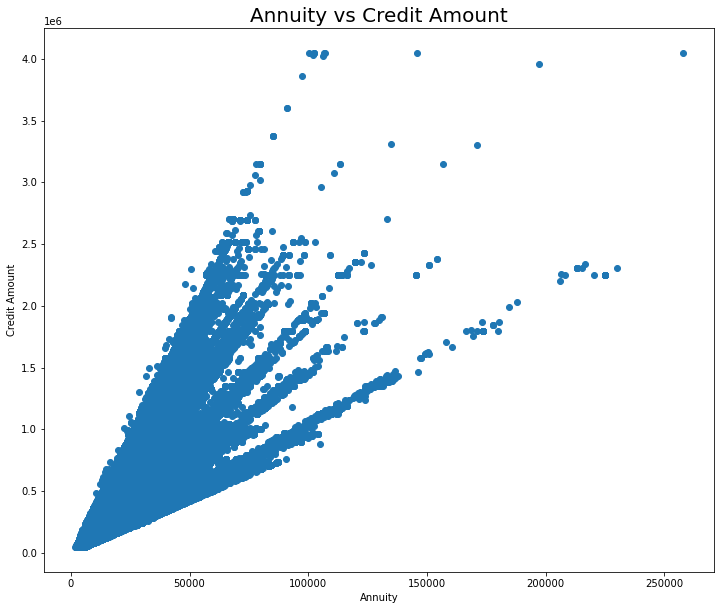

In [21]:
plt.figure(figsize = (12, 10))
plt.title("Annuity vs Credit Amount", fontsize = 20)
plt.scatter(df.AMT_ANNUITY, df.AMT_CREDIT_current)
plt.xlabel("Annuity")
plt.ylabel("Credit Amount")
plt.show()

In [79]:
print(f"Correlation of Annuity and Credit: {df.AMT_ANNUITY.corr(df.AMT_CREDIT_current)}")

### We can also observe that there is a high correlation between loan amount and the annuity, so we will drop the one that has 
### weaker correlation with our target variable
print(f"Correlation of Default and Credit: {df.TARGET.corr(df.AMT_CREDIT_current)}")
print(f"Correlation of Default and Annuity: {df.TARGET.corr(df.AMT_ANNUITY)}")

df.drop(['AMT_ANNUITY'], axis = 1, inplace = True)

Correlation of Annuity and Credit: 0.7701844327181433
Correlation of Default and Credit: -0.030386293442097354
Correlation of Default and Annuity: -0.012762941348751609


In [80]:
### OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE and OBS_60_CNT_SOCIAL_CIRCLE had high correlations
### with each other, so we kept the column ("OBS_60_CNT_SOCIAL_CIRCLE") that had the highest correlation with our target variable

### Column that we thought weren't needed for the analysis
df.drop(['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
        'DAYS_LAST_PHONE_CHANGE', 'DAYS_REGISTRATION', 'EXT_SOURCE_2',
        'EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_QRT',
        'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_DAY',
        'AMT_REQ_CREDIT_BUREAU_HOUR', 'CNT_FAM_MEMBERS', 'FLAG_EMP_PHONE', 'CNT_CHILDREN'], axis = 1, inplace = True)

# Dropping all null value row
df.dropna(axis = 0, inplace = True)

### KMeans Clustering

In [82]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [120]:
normalize_features = ['AMT_INCOME_TOTAL', 'AMT_CREDIT_current', 'AMT_GOODS_PRICE', 
                      'AGE', 'YEARS_EXP', 'AMT_CREDIT_previous', 'DEF_60_CNT_SOCIAL_CIRCLE']

In [148]:
### Applies Standard Scaler to our numerical data by removing the mean and scaling to unit variance.
scaler = StandardScaler()
df_normalized = df.copy()

df_normalized[normalize_features] = scaler.fit_transform(df_normalized[normalize_features])

# Extra columns that
df_normalized.drop(['NAME_CASH_LOAN_PURPOSE', 'CODE_REJECT_REASON', 'NAME_YIELD_GROUP'], axis = 1, inplace = True)

In [150]:
df_normalized = pd.get_dummies(df_normalized, drop_first = True)

df_normalized.head(10)

,TARGET,CODE_GENDER_M,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT_current,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,AGE,YEARS_EXP,...,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,NAME_CONTRACT_STATUS_Canceled,NAME_CONTRACT_STATUS_Refused,NAME_CONTRACT_STATUS_Unused offer
0,1,1,0,1,0.097432,-0.504089,-0.530410,0.018801,-1.498403,-0.783628,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0.342452,1.681528,1.560565,0.003541,0.505965,-0.471402,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1,1,-0.392609,-1.173392,-1.110564,0.010032,1.207495,-0.939741,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,-0.147589,-0.735526,-0.675448,0.008019,1.207495,0.309162,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,1,-0.196593,-0.241879,-0.095294,0.028663,1.407931,0.309162,...,0,0,0,0,0,0,0,0,1,0
5,0,1,0,1,-0.278266,-0.297338,-0.252419,0.035792,0.606184,-0.315290,...,0,0,0,0,0,0,0,0,0,0
6,0,0,1,1,-0.016911,2.340052,2.273672,0.035792,-0.295782,0.309162,...,0,0,0,0,0,0,0,1,0,0
7,0,1,1,1,0.669146,2.264334,2.636268,0.003122,1.107276,-0.783628,...,0,0,0,0,0,0,0,1,0,0
9,0,1,0,1,-0.147589,-0.508026,-0.385371,0.019689,-0.095345,-0.159177,...,0,0,0,0,0,0,0,1,0,0
10,0,0,0,1,-0.229262,0.101893,0.279390,0.022800,-1.297967,-0.783628,...,0,0,0,0,0,0,0,0,0,0


In [153]:
#Function for finding optimal number of clusters

def optimal_kmeans(data, max_k):
    number_of_clusters = []
    inertias = []
    
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters = k)
        kmeans.fit(data)
        
        number_of_clusters.append(k)
        inertias.append(kmeans.inertia_)
        
    # Generate elbow plot
    fig = plt.subplots(figsize = (10,8))
    plt.plot(number_of_clusters, inertias, 'o-')
    plt.xlabel("Number of clusters")
    plt.ylabel("Inertia")
    plt.grid = True
    plt.show()

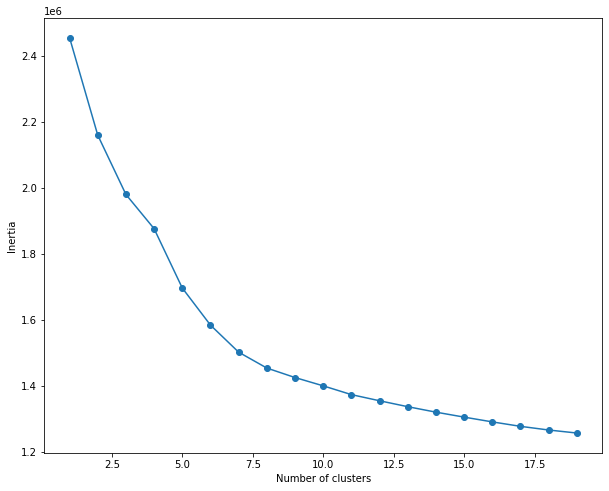

In [155]:
optimal_kmeans(df_normalized, 20)

In [206]:
kmeans = KMeans(n_clusters = 10)

kmeans.fit(df_normalized)

df_normalized['Kmeans_10'] = kmeans.labels_

In [187]:
kmeans.cluster_centers_

array([[ 4.50897975e-02,  4.14749713e-01,  5.28009171e-01,
         6.07413068e-01,  3.75672332e-01,  2.43874687e+00,
         2.50663306e+00,  2.52701015e-02,  2.32798368e-01,
         1.94782360e-01,  2.51356515e-01,  3.47344287e-01,
         7.78754299e-02,  1.84149790e+00,  2.62896446e-02,
         1.00343905e-01,  8.37600306e-02,  6.61826519e-02,
         2.28505923e-01,  1.91134887e-01, -1.42669005e-01,
        -7.30411348e-02,  2.38440963e-02, -1.52465931e-19,
         1.30836836e-01,  4.69545281e-01,  4.78792511e-01,
         3.19449752e-02,  3.74474589e-03,  4.84371418e-01,
         8.03897593e-01,  4.36377532e-02,  7.64233856e-02,
         1.42147497e-02,  9.10737486e-01,  3.53840275e-02,
         1.01643103e-02,  1.11578143e-02,  2.83530760e-02,
         5.73175392e-03,  1.15399312e-02,  1.60565533e-01,
         7.91746274e-02,  4.66182652e-03,  6.78639664e-02,
         4.27970959e-03,  1.76843714e-01,  1.37562094e-03,
         2.29423003e-01,  3.42376767e-02,  1.38326328e-0

In [157]:
df_normalized.head(10)

,TARGET,CODE_GENDER_M,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT_current,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,AGE,YEARS_EXP,...,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,NAME_CONTRACT_STATUS_Canceled,NAME_CONTRACT_STATUS_Refused,NAME_CONTRACT_STATUS_Unused offer,Kmeans_10
0,1,1,0,1,0.097432,-0.504089,-0.530410,0.018801,-1.498403,-0.783628,...,0,0,0,0,0,0,0,0,0,6
1,0,0,0,0,0.342452,1.681528,1.560565,0.003541,0.505965,-0.471402,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1,1,-0.392609,-1.173392,-1.110564,0.010032,1.207495,-0.939741,...,0,0,0,0,0,0,0,0,0,9
3,0,0,0,1,-0.147589,-0.735526,-0.675448,0.008019,1.207495,0.309162,...,0,0,0,0,0,0,0,0,0,9
4,0,1,0,1,-0.196593,-0.241879,-0.095294,0.028663,1.407931,0.309162,...,0,0,0,0,0,0,0,1,0,9
5,0,1,0,1,-0.278266,-0.297338,-0.252419,0.035792,0.606184,-0.315290,...,0,0,0,0,0,0,0,0,0,9
6,0,0,1,1,-0.016911,2.340052,2.273672,0.035792,-0.295782,0.309162,...,0,0,0,0,0,0,1,0,0,0
7,0,1,1,1,0.669146,2.264334,2.636268,0.003122,1.107276,-0.783628,...,0,0,0,0,0,0,1,0,0,0
9,0,1,0,1,-0.147589,-0.508026,-0.385371,0.019689,-0.095345,-0.159177,...,0,0,0,0,0,0,1,0,0,9
10,0,0,0,1,-0.229262,0.101893,0.279390,0.022800,-1.297967,-0.783628,...,0,0,0,0,0,0,0,0,0,8


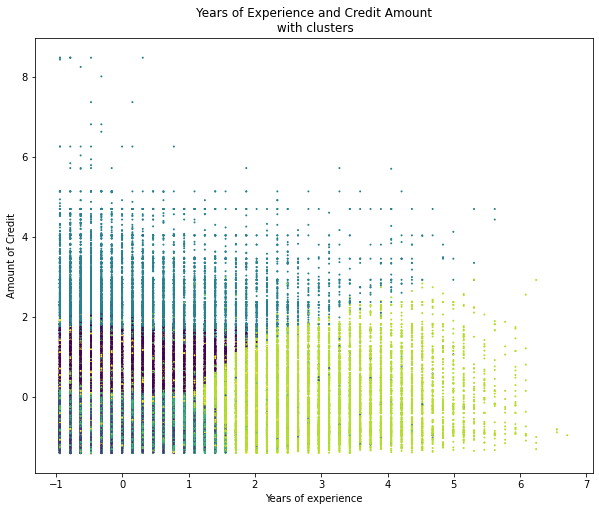

In [511]:
plt.figure(figsize = (10,8))
plt.scatter(df_normalized['YEARS_EXP'], df_normalized['AMT_CREDIT_current'], c = df_normalized['Kmeans_10'], s = 1)
plt.title("Years of Experience and Credit Amount\n with clusters")
plt.xlabel("Years of experience")
plt.ylabel("Amount of Credit")
plt.show()

In [180]:
# Average number of defaulters within clusters

df_normalized.groupby('Kmeans_10').mean()['TARGET']*100

Kmeans_10
0      4.510073
1     11.963830
2      6.512758
3      9.351052
4      4.509300
5    100.000000
6     13.715805
7     11.707576
8      8.171750
9      8.368868
Name: TARGET, dtype: float64

In [207]:
# For cluster 5 we have 100% of Target = 1, meaning everyone defaults, but the code below shows that there is only one record
# of data. So we will drop that observation simply because it is an outlier.

print(df_normalized.groupby('Kmeans_10').count())

df_normalized.drop(df_normalized.loc[df_normalized['Kmeans_10'] == 5].index.to_list(), axis = 0, inplace = True)

           TARGET  CODE_GENDER_M  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
Kmeans_10                                                         
0           24505          24505         24505            24505   
1           24686          24686         24686            24686   
2           38786          38786         38786            38786   
3            2632           2632          2632             2632   
4           12618          12618         12618            12618   
5           27853          27853         27853            27853   
6           38322          38322         38322            38322   
7           12050          12050         12050            12050   
8           15777          15777         15777            15777   
9           12946          12946         12946            12946   

           AMT_INCOME_TOTAL  AMT_CREDIT_current  AMT_GOODS_PRICE  \
Kmeans_10                                                          
0                     24505               24505            

In [208]:
data = df_normalized.drop(['Kmeans_10'], axis = 1).copy()

data.shape

(182322, 59)

### Getting data ready

In [209]:
data.head()

,TARGET,CODE_GENDER_M,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT_current,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,AGE,YEARS_EXP,...,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,NAME_CONTRACT_STATUS_Canceled,NAME_CONTRACT_STATUS_Refused,NAME_CONTRACT_STATUS_Unused offer
0,1,1,0,1,0.097432,-0.504089,-0.530410,0.018801,-1.498403,-0.783628,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0.342452,1.681528,1.560565,0.003541,0.505965,-0.471402,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1,1,-0.392609,-1.173392,-1.110564,0.010032,1.207495,-0.939741,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,-0.147589,-0.735526,-0.675448,0.008019,1.207495,0.309162,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,1,-0.196593,-0.241879,-0.095294,0.028663,1.407931,0.309162,...,0,0,0,0,0,0,0,0,1,0


In [210]:
data.shape

(182322, 59)

In [212]:
### data.to_csv("Normalized_with_dummies.csv")

In [283]:
X, Y = data.drop(["TARGET"], axis = 1), data['TARGET']

In [391]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

### Hyperparameter Tuning

In [407]:
# Dictionary of model names and different parameters that we want to test

model_params = {
    'random_forest' : {
        'model' : RandomForestClassifier(),
        'params' : {
            'n_estimators' : [50, 100, 150, 200],
            'class_weight' : [{0:1,1:1}, {0:0.1,1:10}, {0:1,1:100}, {0:0.0001,1:1000}, {0:0.1,1:10000}]
        }
    },
    'logistic_regression' : {
        'model' : LogisticRegression(solver = 'saga', penalty = 'l1', max_iter = 100000),
        'params' : {
            "C" : [1, 4, 10]
        }
    },
    'gradient_boosting' : {
        'model' : GradientBoostingClassifier(),
        'params' : {
            'learning_rate' : [0.01, 0.1, 0.3, 0.5],
            'n_estimators' : [50, 100, 150, 200]
        }
    },
    'xg_boosting' : {
        'model' : XGBClassifier(),
        'params' : {
            'learning_rate' : [0.01, 0.3, 0.5],
            'n_estimators' : [50, 100, 150],
            'gamma' : [10, 50, 100]
        }
    }
}

In [408]:
performance = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv = 5, return_train_score = False)
    clf.fit(X, Y)
    
    performance.append({
        'model' : model_name,
        'best_score' : clf.best_score_,
        'best_params' : clf.best_params_
    })

In [409]:
# Data frame of the performance matrix of GridSearch
perf_matrix = pd.DataFrame(performance, columns = ['model', 'best_score', 'best_params'])

perf_matrix

,model,best_score,best_params
0,random_forest,0.911042,"{'class_weight': {0: 0.1, 1: 10}, 'n_estimator..."
1,logistic_regression,0.911020,{'C': 1}
2,gradient_boosting,0.911037,"{'learning_rate': 0.01, 'n_estimators': 50}"
3,xg_boosting,0.911047,"{'gamma': 10, 'learning_rate': 0.3, 'n_estimat..."


#### As we can see all of the four models perform the same in the case of accuracy. So, we will choose our model based on AUC score by using the best parameters that we have obtained above

In [488]:
### Function to get the accuracy score of the model

def get_acc(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    
    return model.score(x_test, y_test)

# Function to get the area under the curve of the model
def get_auc_score(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    y_pred_prob = model.predict_proba(x_test)[:,1]
    
    return roc_auc_score(y_test, y_pred_prob)

# Function of getting the predictions of the model
def get_predictions(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    
    return model.predict(x_test)

# Printing the confustion matrix heatmap
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    
    tn, fp, fn, tp = confusion_matrix.ravel()
    confusion_matrix = np.array([[tp, fp], [fn, tn]])
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    
    fig = plt.figure(figsize = figsize)
    plt.title("Confustion Matrix\n")
    heatmap = sb.heatmap(df_cm, annot = True, fmt = "d")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha = 'right', fontsize = fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha = 'right', fontsize = fontsize)
    heatmap.set(xlabel = 'Actual', ylabel = 'Predicted')

In [412]:
from sklearn.model_selection import StratifiedKFold

k_fold = StratifiedKFold(n_splits = 5) # We will do 5 splits for the cross validation

In [413]:
lr_auc = []
rf_auc = []
gb_auc = []
xgb_auc = []

# Claculating mean auc score for each model by using best parameters that we have obtained from GridSearch

for train_index, test_index in k_fold.split(X, Y):
    x_train, x_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], \
                                        Y.iloc[train_index], Y.iloc[test_index]
    
    
    lr_auc.append(get_auc_score(LogisticRegression(solver = 'saga', penalty = 'l1', max_iter = 100000, C = 1.0), x_train, x_test, y_train, y_test))
    rf_auc.append(get_auc_score(RandomForestClassifier(class_weight = {0: 0.1, 1: 10}, n_estimators = 200), x_train, x_test, y_train, y_test))
    gb_auc.append(get_auc_score(GradientBoostingClassifier(learning_rate = 0.01, n_estimators = 50), x_train, x_test, y_train, y_test))
    xgb_auc.append(get_auc_score(XGBClassifier(gamma = 10, learning_rate = 0.3, n_estimators = 50), x_train, x_test, y_train, y_test))
    
    print('Iteration complete')

Iteration complete
Iteration complete
Iteration complete
Iteration complete
Iteration complete


In [415]:
print(f'Logistic Regression Mean AUC:', np.asarray(lr_auc).mean())
print(f'Random Forest Mean AUC:', np.asarray(rf_auc).mean())
print(f'Gradient Boosting Classifier Mean AUC:', np.asarray(gb_auc).mean())
print(f'Extreme Gradient Boosting Clasifier Mean AUC:', np.asarray(xgb_auc).mean())

Logistic Regression Mean AUC: 0.6725885066132276
Random Forest Mean AUC: 0.6493904829286092
Gradient Boosting Classifier Mean AUC: 0.6464748736877175
Extreme Gradient Boosting Clasifier Mean AUC: 0.682256762005794


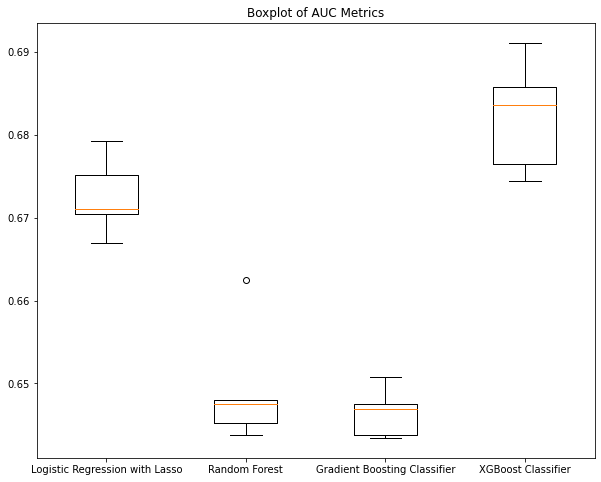

In [506]:
plt.figure(figsize = (10,8))
plt.title("Boxplot of AUC Metrics")
plt.boxplot([lr_auc, rf_auc, gb_auc, xgb_auc], labels = ["Logistic Regression with Lasso", 'Random Forest', 
                                                         'Gradient Boosting Classifier', 'XGBoost Classifier'])
plt.show()

#### As we can see XGBoost Classifier works best among the other model and thus we will choose this model to compute our profit maximization point

Accuracy:  0.9822073035618302
AUC:  0.9659242968320938
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    166102
           1       1.00      0.80      0.89     16220

    accuracy                           0.98    182322
   macro avg       0.99      0.90      0.94    182322
weighted avg       0.98      0.98      0.98    182322



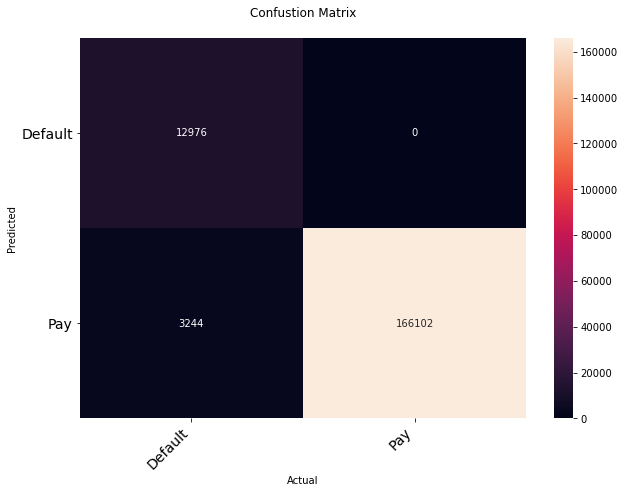

In [439]:
xgboost = XGBClassifier(gamma = 10, learning_rate = 0.3, n_estimators = 50)
xgboost.fit(X, Y)

y_pred_prob = rf.predict_proba(X)[:,1]
y_pred = rf.predict(X)

print(f'Accuracy: ', rf.score(X, Y))
print(f'AUC: ', roc_auc_score(Y, y_pred_prob))
print(classification_report(Y, y_pred))
print_confusion_matrix(confusion_matrix(Y, y_pred), class_names = ["Default", "Pay"])

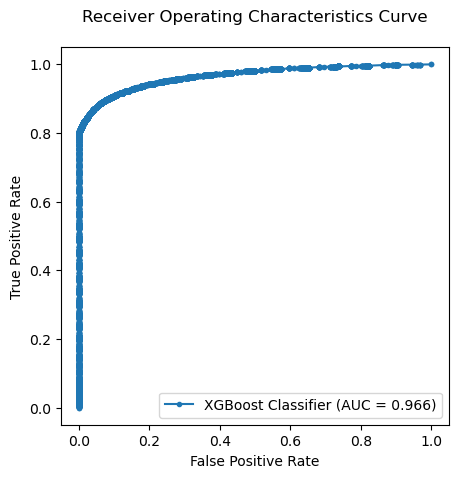

In [487]:
from sklearn.metrics import roc_curve, auc

rf_fpr, rf_tpr, threshold = roc_curve(Y, y_pred_prob)
auc_rf = auc(rf_fpr, rf_tpr)

plt.figure(figsize = (5, 5), dpi = 100)
plt.title("Receiver Operating Characteristics Curve\n")
plt.plot(rf_fpr, rf_tpr, marker = '.', label = 'XGBoost Classifier (AUC = %0.3f)' % auc_rf)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show()

In [443]:
### For the values of cost benefit matrix, we have provided an R code that goes into the detail of the calculations
### expected gain ---  235677.4
### expected loss --- -434395.2

cost_benefit = np.array([[235677.4, 0], [-434395.2, 0]])

In [467]:
thresholds = []
expected_profits = []

for threshold in np.linspace(0,1,2000):
    thresholds.append(threshold)
    y_pred = [1 if probability > threshold else 0 for probability in y_pred_prob]
    normalized_cm = confusion_matrix(Y, y_pred, normalize = 'all')
    expected_profits.append(np.dot(normalized_cm[:,0], cost_benefit[:,0]))

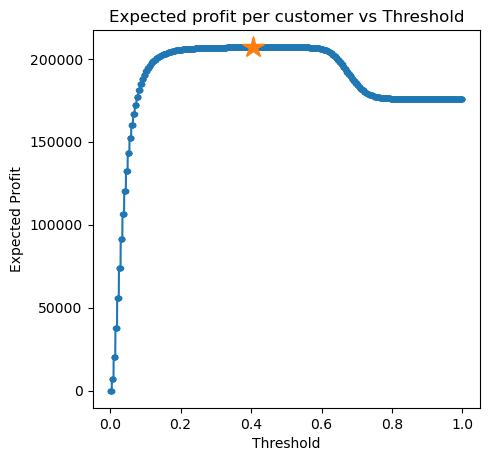

In [493]:
plt.figure(figsize = (5, 5), dpi = 100)
plt.title("Expected profit per customer vs Threshold")
plt.plot(thresholds, expected_profits, marker = ".")
plt.plot(thresholds[np.asarray(expected_profits).argmax()], np.asarray(expected_profits).max(), marker="*", markersize=16)
plt.xlabel("Threshold")
plt.ylabel("Expected Profit")
plt.show()

### So, to maximize the profit we will choose XGBoost Classifier model and the threshold of 0.4 in the deployment.